In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [4]:
placement=pd.read_csv("Placement_Data_Full_Class.csv")

In [5]:
placement_copy=placement.copy()
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
print ("The shape of the  data is (row, column):"+ str(placement.shape))
print (placement_copy.info())

The shape of the  data is (row, column):(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


In [7]:
#Looking at the datatypes of each factor
placement_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

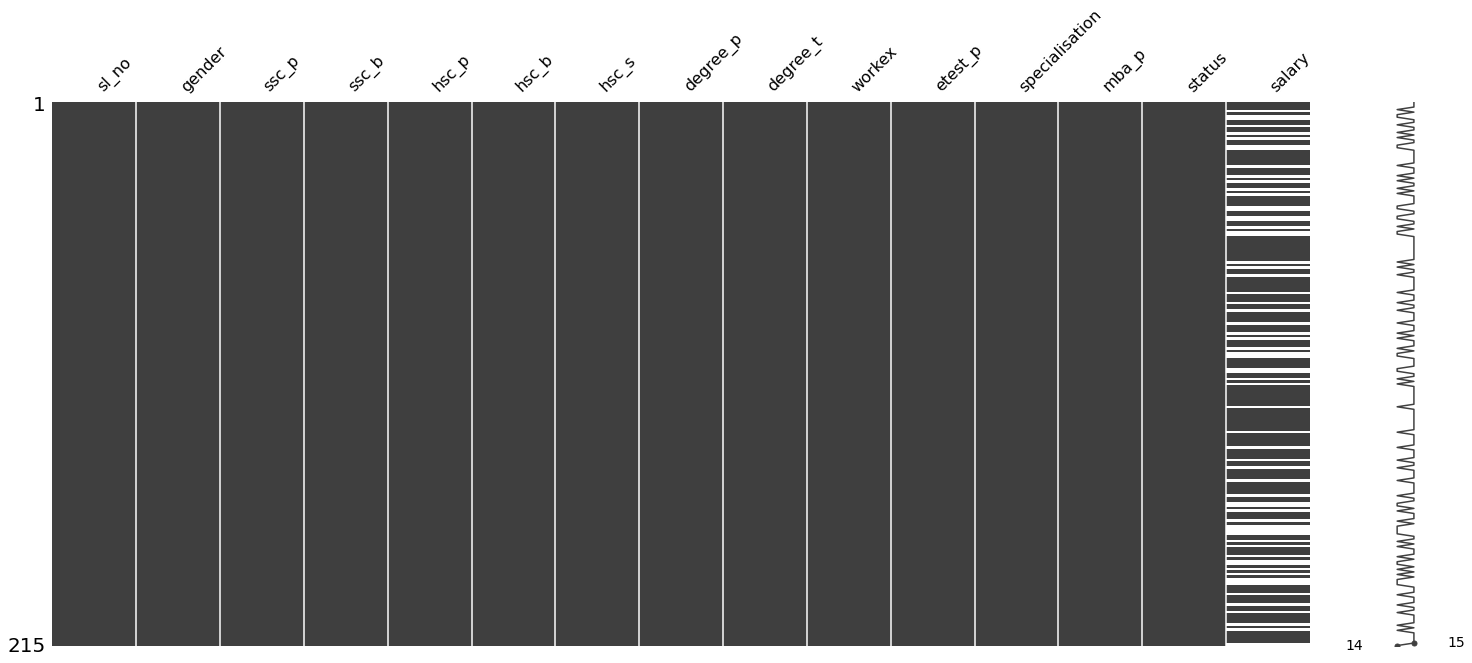

In [8]:
import missingno as msno 
msno.matrix(placement)

In [9]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [10]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


In [11]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Employability percentage')

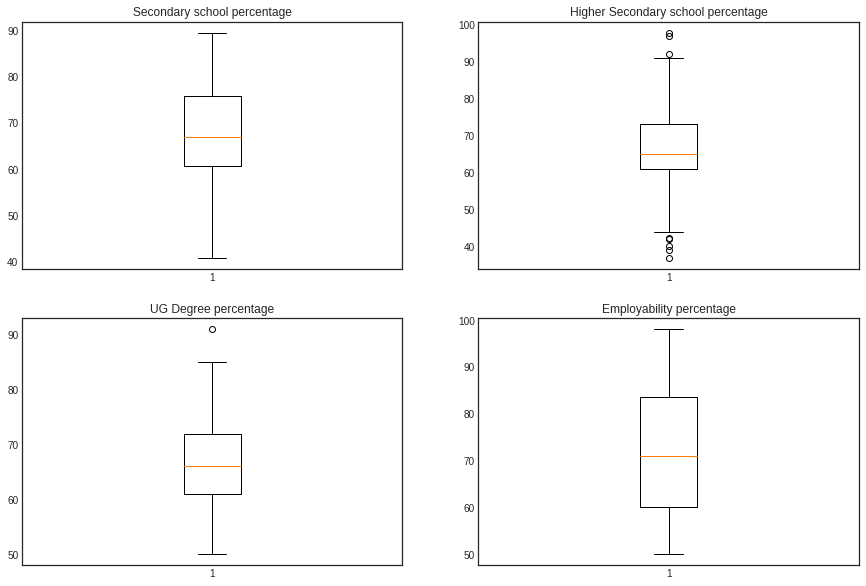

In [12]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')

ax=plt.subplot(2,2,1)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary school percentage')

ax=plt.subplot(2,2,2)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher Secondary school percentage')

ax=plt.subplot(2,2,3)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Degree percentage')

ax=plt.subplot(2,2,4)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability percentage')

In [13]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_copy.loc[filter]

In [14]:
placement_filtered.shape

(207, 12)

[Text(0, 0, 'Placed'), Text(0, 0, 'Not Placed')]

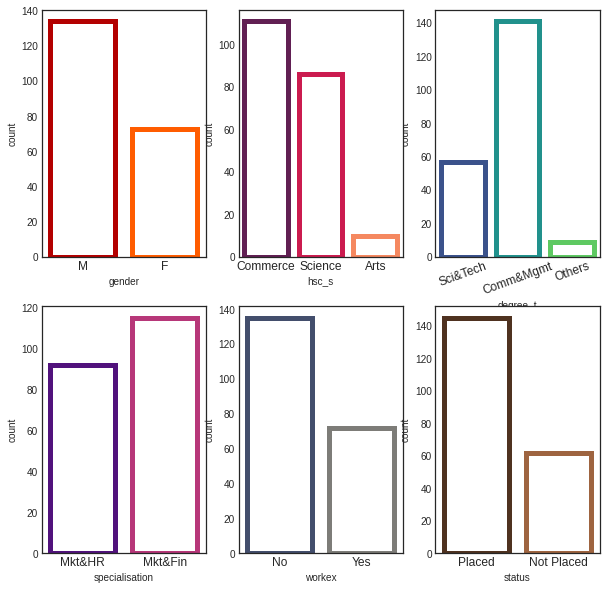

In [15]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

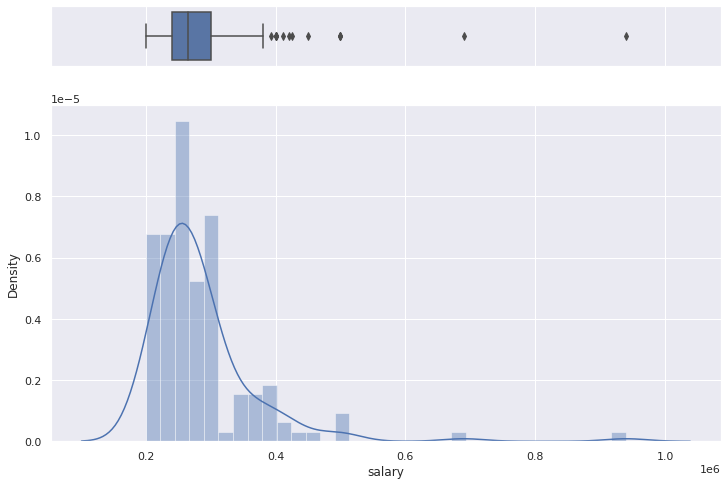

In [16]:
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

placement_placed = placement_filtered[placement_filtered.salary != 0]
sns.boxplot(placement_placed["salary"], ax=ax_box)
sns.distplot(placement_placed["salary"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

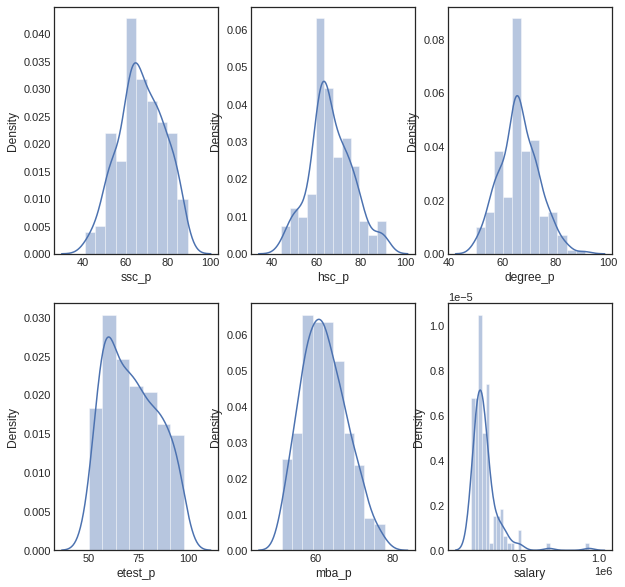

In [17]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(placement_filtered['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(placement_filtered['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(placement_filtered['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(placement_filtered['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(placement_filtered['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)



plt.subplot(236)
sns.distplot(placement_placed['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

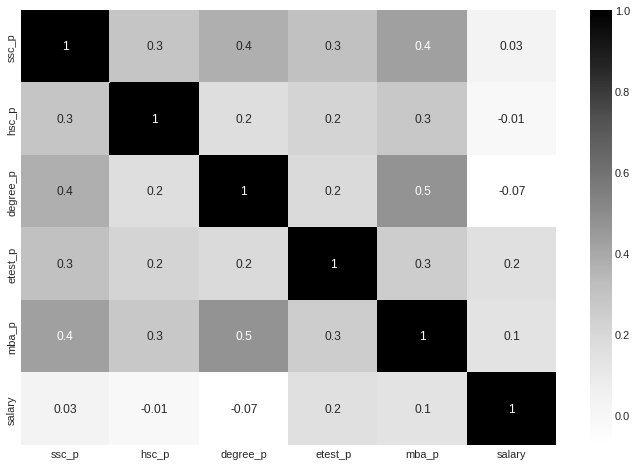

In [18]:
sns.heatmap(placement_placed.corr(),annot=True,fmt='.1g',cmap='Greys')

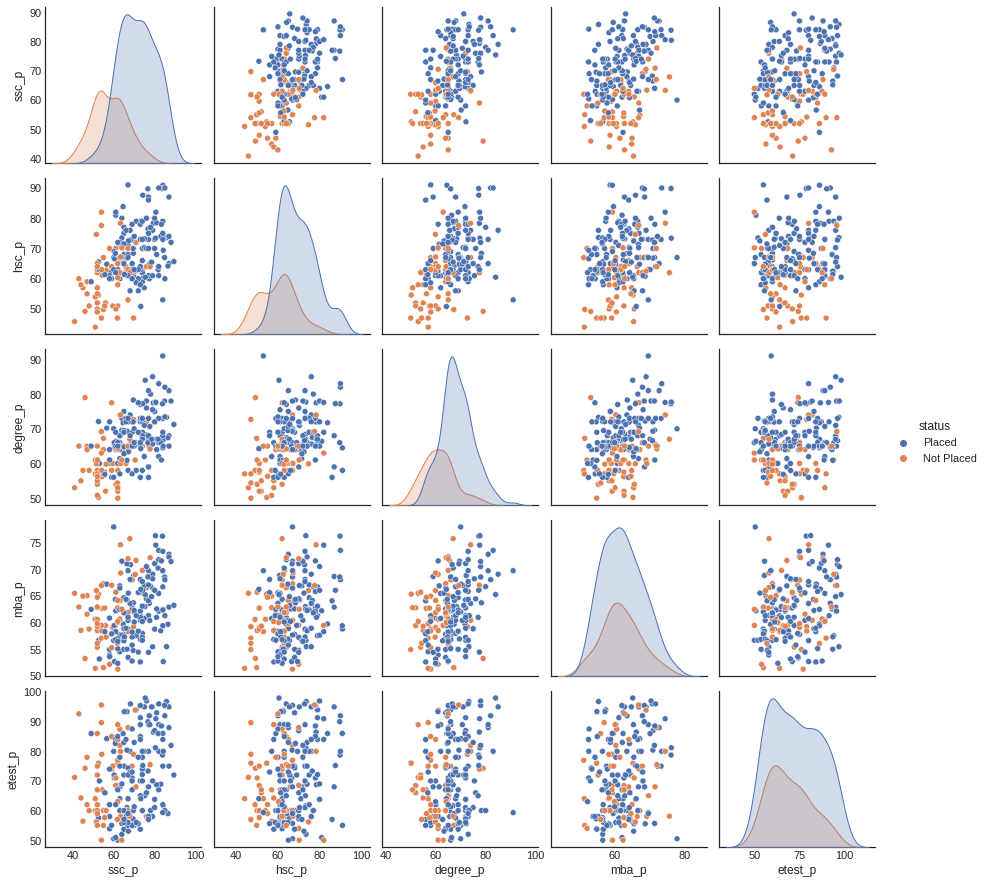

In [19]:
sns.pairplot(placement_filtered,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

In [20]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    placement_filtered[col] = label_encoder.fit_transform(placement_filtered[col])
placement_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [21]:
dummy_hsc_s=pd.get_dummies(placement_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(placement_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([placement_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [22]:
feature_cols=['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

14

In [23]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (165, 14)
Input Test: (42, 14)
Output Training: (165,)
Output Test: (42,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 8  7]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.79      0.96      0.87        27

    accuracy                           0.81        42
   macro avg       0.84      0.75      0.77        42
weighted avg       0.82      0.81      0.80        42



### DENGAN SEQUENTIALS

In [27]:
import numpy as np
import pandas as pd

In [28]:
data = pd.read_csv('Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [29]:
print("The shape of data is" , data.shape)
data.info()

The shape of data is (215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [30]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [31]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [32]:
data = data.drop(columns = ['sl_no','ssc_b','hsc_b'], axis=1)
data.head(5)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [33]:
data['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [34]:
data['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [35]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

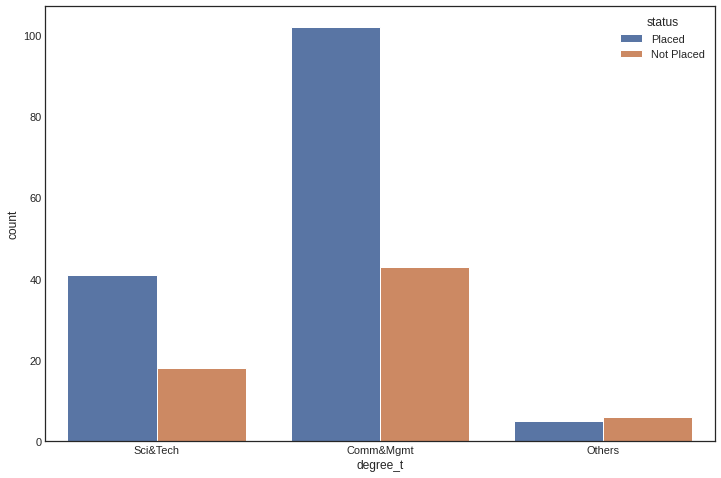

In [36]:
import seaborn as sns
sns.countplot(x='degree_t',hue='status',data=data)

In [37]:
data['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [38]:
data.replace({'gender':{'M':0,'F':1},'hsc_s':{'Commerce':0,'Science':1,'Arts':2},
              'degree_t':{'Comm&Mgmt':0,'Sci&Tech':1,'Others':2},
              'workex':{'No':0,'Yes':1},'specialisation':{'Mkt&Fin':0,'Mkt&HR':1},
              'status': {'Placed':0,'Not Placed':1}},inplace=True)
data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,0,58.00,1,0,55.0,1,58.80,0,270000.0
1,0,79.33,78.33,1,77.48,1,1,86.5,0,66.28,0,200000.0
2,0,65.00,68.00,2,64.00,0,0,75.0,0,57.80,0,250000.0
3,0,56.00,52.00,1,52.00,1,0,66.0,1,59.43,1,NaN
4,0,85.80,73.60,0,73.30,0,0,96.8,0,55.50,0,425000.0


In [39]:
data['salary'] = data['salary'].fillna((data['salary'].mean()))
data.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [40]:
data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,0,58.00,1,0,55.0,1,58.80,0,270000.000000
1,0,79.33,78.33,1,77.48,1,1,86.5,0,66.28,0,200000.000000
2,0,65.00,68.00,2,64.00,0,0,75.0,0,57.80,0,250000.000000
3,0,56.00,52.00,1,52.00,1,0,66.0,1,59.43,1,288655.405405
4,0,85.80,73.60,0,73.30,0,0,96.8,0,55.50,0,425000.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   hsc_s           215 non-null    int64  
 4   degree_p        215 non-null    float64
 5   degree_t        215 non-null    int64  
 6   workex          215 non-null    int64  
 7   etest_p         215 non-null    float64
 8   specialisation  215 non-null    int64  
 9   mba_p           215 non-null    float64
 10  status          215 non-null    int64  
 11  salary          215 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 20.3 KB


In [42]:
data = data.astype("int32")

In [43]:
data.shape

(215, 12)

In [44]:
data.describe()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.148837,66.195349,0.525581,66.241860,0.376744,0.344186,71.976744,0.441860,61.786047,0.311628,288655.279070
std,0.479168,10.789238,10.861876,0.594403,7.350829,0.581987,0.476211,13.275810,0.497767,5.850217,0.464240,77457.900102
min,0.000000,40.000000,37.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.000000,0.000000,200000.000000
25%,0.000000,60.000000,60.500000,0.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.000000,0.000000,250000.000000
50%,0.000000,67.000000,65.000000,0.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,0.000000,288655.000000
75%,1.000000,75.500000,73.000000,1.000000,72.000000,1.000000,1.000000,83.500000,1.000000,66.000000,1.000000,288655.000000
max,1.000000,89.000000,97.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.000000,1.000000,940000.000000


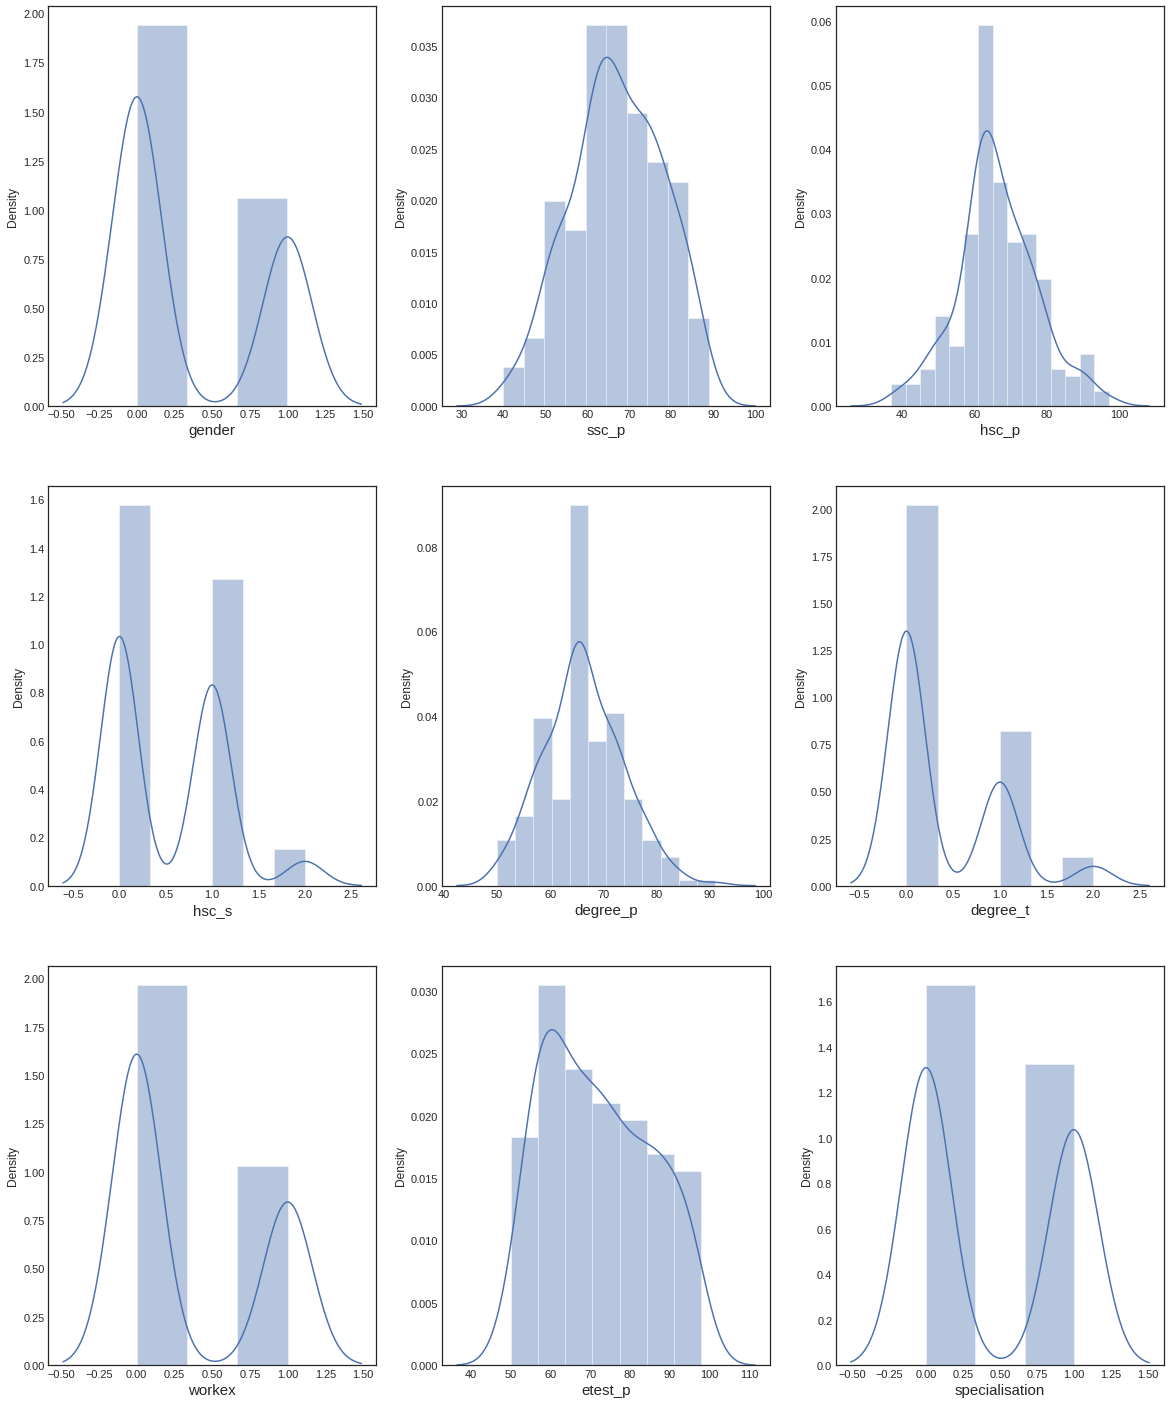

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

In [47]:
data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67,91,0,58,1,0,55,1,58,0,270000
1,0,79,78,1,77,1,1,86,0,66,0,200000
2,0,65,68,2,64,0,0,75,0,57,0,250000
3,0,56,52,1,52,1,0,66,1,59,1,288655
4,0,85,73,0,73,0,0,96,0,55,0,425000


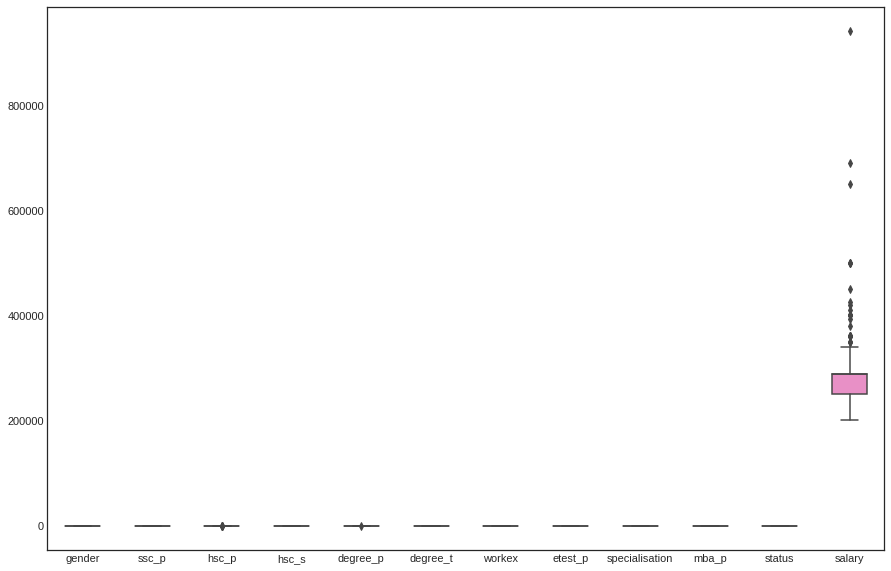

In [48]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 5)
plt.show()

In [49]:
X = data.drop(columns  = ['status'], axis=1)
y = data['status']

In [50]:
print(X.shape)
print(y.shape)

(215, 11)
(215,)


### TRAINING DULU GESSSSSS

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 , stratify=y)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(172, 11)
(43, 11)
(172,)
(43,)


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
X_train.shape

(172, 11)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [56]:
#adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(units=16, kernel_initializer="glorot_uniform", activation='relu',input_dim=11))
classifier.add(Dropout(rate=0.1))

#adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer="glorot_uniform", activation='relu'))
classifier.add(Dropout(rate=0.1))

#adding the output layer
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation='sigmoid'))

In [58]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [60]:
classifier.fit(X_train, y_train, batch_size=100, epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 7ms/step - loss: 0.6669 - accuracy: 0.6744
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 0.6408 - accuracy: 0.6686
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6546 - accuracy: 0.6802
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6337 - accuracy: 0.6802
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6249 - accuracy: 0.6744
Epoch 6/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6208 - accuracy: 0.6628
Epoch 7/200
2/2 [==============================] - 0s 11ms/step - loss: 0.6194 - accuracy: 0.6744
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6024 - accuracy: 0.6686
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 0.5984 - accuracy: 0.6977
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6139 - accuracy: 0.6919
Epoch 11/200
2/2 [==========

In [61]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [63]:
cm

array([[29,  1],
       [ 1, 12]])

In [64]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=16, kernel_initializer="glorot_uniform", activation='relu',input_dim=11))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units=16, kernel_initializer="glorot_uniform", activation='relu'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation='sigmoid'))
    classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)

In [65]:
accuracies

array([0.77777779, 1.        , 0.94117647, 0.88235295, 0.7647059 ,
       0.88235295, 0.94117647, 0.7647059 , 0.88235295, 0.64705884])

In [66]:
accuracies.mean()


0.8483660221099854

In [67]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def built_classifier(optimizer = 'adam'):
    classifier = Sequential()
    classifier.add(Dense(units=16, kernel_initializer="glorot_uniform", activation='relu',input_dim=11))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units=16, kernel_initializer="glorot_uniform", activation='relu'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation='sigmoid'))
    classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = built_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Streaming output truncated to the last 5000 lines.
5/5 [==============================] - 1s 3ms/step - loss: 0.6513 - accuracy: 0.6258
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.6968
Epoch 3/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6034 - accuracy: 0.7097
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.7226
Epoch 5/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5484 - accuracy: 0.7548
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5347 - accuracy: 0.7484
Epoch 7/500
5/5 [==============================] - 0s 5ms/step - loss: 0.5576 - accuracy: 0.7419
Epoch 8/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5146 - accuracy: 0.7742
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5014 - accuracy: 0.7871
Epoch 10/500
5/5 [==============================] - 0s 4ms/step - loss: 0.4946 - accurac